# Introduction

The aim of this notebook is to predict the prices of stainless-steel using a csv file.

# Data

In [27]:
# import all packages needed in this notebook

import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library 
import os

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
data_path = os.path.abspath("Stainless_Steel_Price.csv") # find the absolute path for the file
steel_df = pd.read_csv(data_path) # load the data and assign to a variable

# Exploratory Data Analysis

This section is dedicated to describe, visualize and explore the dataset

In [3]:
steel_df.shape # show number of rows and columns respectively 

(84, 20)

In [4]:
steel_df.head() # show top 5 rows

,Date,StainlessSteelPrice,Steel_Inventory_M_USD,Steel_Orders_M_USD,IronOre_Global_USD,CoalAustralia_Global_USD,Energy_Index,Nickel_Global_USD,Zinc_Global_USD,Freight_Transport_Index,WTI_Crude_Global_USD,Baltic_Dry_Index,BCI_China,BCI_Europe,BCI_US,CLI_China,CLI_Europe,CLI_US,PMI_US_Manufacturing,Copper_Global_USD
0,07/01/2013,0.827352,20575,10568,127.191304,82.222360,227.022942,13750.31522,1837.619565,-0.4,104.545217,1062,98.80018,99.64265,100.1044,101.1423,99.43615,100.6230,50.9,6906.64
1,08/01/2013,0.760221,20609,10821,137.055000,82.221429,232.234194,14308.26190,1896.392857,0.5,106.546364,1132,99.04874,99.91766,100.3962,101.1938,99.64082,100.6545,55.4,7186.25
2,09/01/2013,0.784715,20761,10774,134.185714,83.295918,234.335594,13801.39286,1846.880952,0.1,106.313810,2003,99.27196,100.18490,100.5363,101.2066,99.84383,100.6646,55.7,7159.27
3,10/01/2013,0.769293,20735,11291,132.572727,85.443634,229.393932,14117.65217,1884.836957,-0.1,100.500435,1504,99.40488,100.36330,100.5771,101.1835,100.02300,100.6666,56.2,7203.02
4,11/01/2013,0.750242,20854,11559,136.323810,88.363265,225.437049,13684.01190,1866.416667,2.1,93.812381,1821,99.36221,100.49830,100.5459,101.1283,100.17150,100.6744,56.4,7070.65


In [5]:
steel_df.info() # summary dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      84 non-null     object 
 1   StainlessSteelPrice       84 non-null     float64
 2   Steel_Inventory_M_USD     84 non-null     int64  
 3   Steel_Orders_M_USD        84 non-null     int64  
 4   IronOre_Global_USD        84 non-null     float64
 5   CoalAustralia_Global_USD  84 non-null     float64
 6   Energy_Index              84 non-null     float64
 7   Nickel_Global_USD         84 non-null     float64
 8   Zinc_Global_USD           84 non-null     float64
 9   Freight_Transport_Index   84 non-null     float64
 10  WTI_Crude_Global_USD      84 non-null     float64
 11  Baltic_Dry_Index          84 non-null     int64  
 12  BCI_China                 84 non-null     float64
 13  BCI_Europe                84 non-null     float64
 14  BCI_US      

In [6]:
steel_df.describe() # descriptive stats 

,StainlessSteelPrice,Steel_Inventory_M_USD,Steel_Orders_M_USD,IronOre_Global_USD,CoalAustralia_Global_USD,Energy_Index,Nickel_Global_USD,Zinc_Global_USD,Freight_Transport_Index,WTI_Crude_Global_USD,Baltic_Dry_Index,BCI_China,BCI_Europe,BCI_US,CLI_China,CLI_Europe,CLI_US,PMI_US_Manufacturing,Copper_Global_USD
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,0.810715,20070.559524,9831.595238,79.962940,81.844151,143.408951,12712.275477,2358.786301,0.122619,61.017507,1067.785714,98.710869,100.569427,100.175521,99.563679,100.023602,99.814380,54.026190,6037.075714
std,0.143444,1764.033210,1240.333905,23.874776,19.443360,47.136073,2694.729168,470.463900,1.230080,21.407539,443.697935,0.848983,1.123901,0.876723,2.027340,1.567463,1.367807,4.097578,783.645475
min,0.499859,16688.000000,7650.000000,40.882609,53.428929,52.771306,8298.500000,1520.362500,-7.100000,16.807273,317.000000,94.501530,95.996640,98.102130,85.383290,90.343960,92.280250,41.500000,4471.790000
25%,0.743778,18980.000000,8904.000000,61.484190,67.111352,111.607197,10578.975000,2021.262099,-0.425000,47.738636,699.500000,98.271312,100.427200,99.535878,99.225065,99.696710,99.278723,51.275000,5645.152500
50%,0.812157,20190.000000,9947.000000,74.280682,78.677679,131.088857,12721.351135,2287.054725,0.250000,54.912545,1058.500000,98.675055,100.562400,100.312350,99.854750,100.294100,100.030800,54.250000,6024.555000
75%,0.893690,21458.500000,11062.500000,92.409524,96.985695,163.923895,14105.350543,2658.296875,0.725000,68.464674,1354.500000,99.364373,101.040100,100.803675,100.518350,100.500175,100.679550,57.400000,6801.285000
max,1.075014,23464.000000,11825.000000,137.055000,125.085877,237.208789,19401.075000,3532.900000,2.100000,106.546364,2378.000000,99.923670,102.323700,101.573800,101.206600,101.709300,100.968000,60.800000,7291.470000


In [7]:
pd.isnull(steel_df).sum() # verify if null values are present

Date                        0
StainlessSteelPrice         0
Steel_Inventory_M_USD       0
Steel_Orders_M_USD          0
IronOre_Global_USD          0
CoalAustralia_Global_USD    0
Energy_Index                0
Nickel_Global_USD           0
Zinc_Global_USD             0
Freight_Transport_Index     0
WTI_Crude_Global_USD        0
Baltic_Dry_Index            0
BCI_China                   0
BCI_Europe                  0
BCI_US                      0
CLI_China                   0
CLI_Europe                  0
CLI_US                      0
PMI_US_Manufacturing        0
Copper_Global_USD           0
dtype: int64

In [8]:
steel_df["Date"].nunique() # check if date column values are unique

84

In [9]:
if steel_df.drop_duplicates().shape == steel_df.shape: # if the shape is the same there are no duplicates
    print("No Duplicates")
else:
    print("There were some duplicates") # if the shape differs it means there were duplicates

No Duplicates


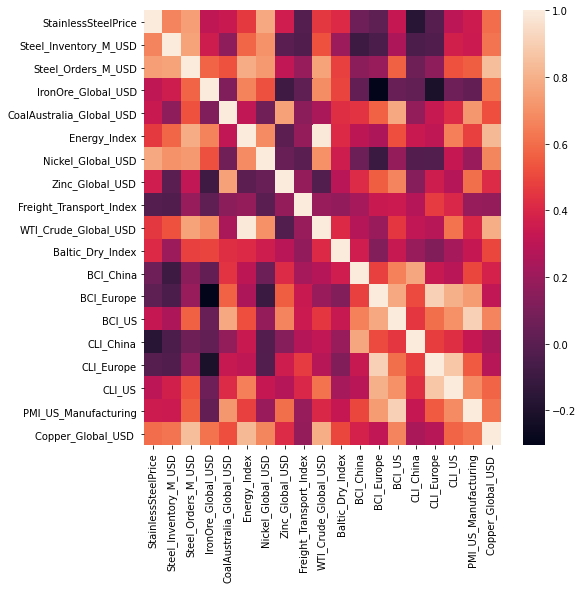

In [10]:
plt.figure(figsize=(8,8)) # make figure size bigger
sns.heatmap(steel_df.corr()); # show a heatmap with correlation 

In [11]:
steel_df["Date"] = pd.to_datetime(steel_df["Date"]) # change the column date to a datetime format

<AxesSubplot:xlabel='Date', ylabel='count'>

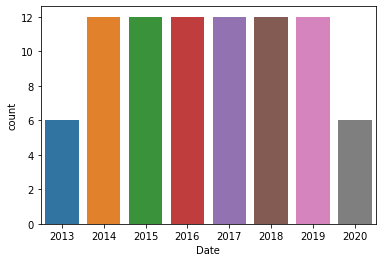

In [12]:
sns.countplot(x=steel_df["Date"].dt.year,data=steel_df) # visualize how many observation there are per year

In [13]:
steel_df.set_index("Date",inplace=True) # set date column as index

In [14]:
steel_df.columns

Index(['StainlessSteelPrice', 'Steel_Inventory_M_USD', 'Steel_Orders_M_USD',
       'IronOre_Global_USD', 'CoalAustralia_Global_USD', 'Energy_Index',
       'Nickel_Global_USD', 'Zinc_Global_USD', 'Freight_Transport_Index',
       'WTI_Crude_Global_USD', 'Baltic_Dry_Index', 'BCI_China', 'BCI_Europe',
       'BCI_US', 'CLI_China', 'CLI_Europe', 'CLI_US', 'PMI_US_Manufacturing',
       'Copper_Global_USD '],
      dtype='object')

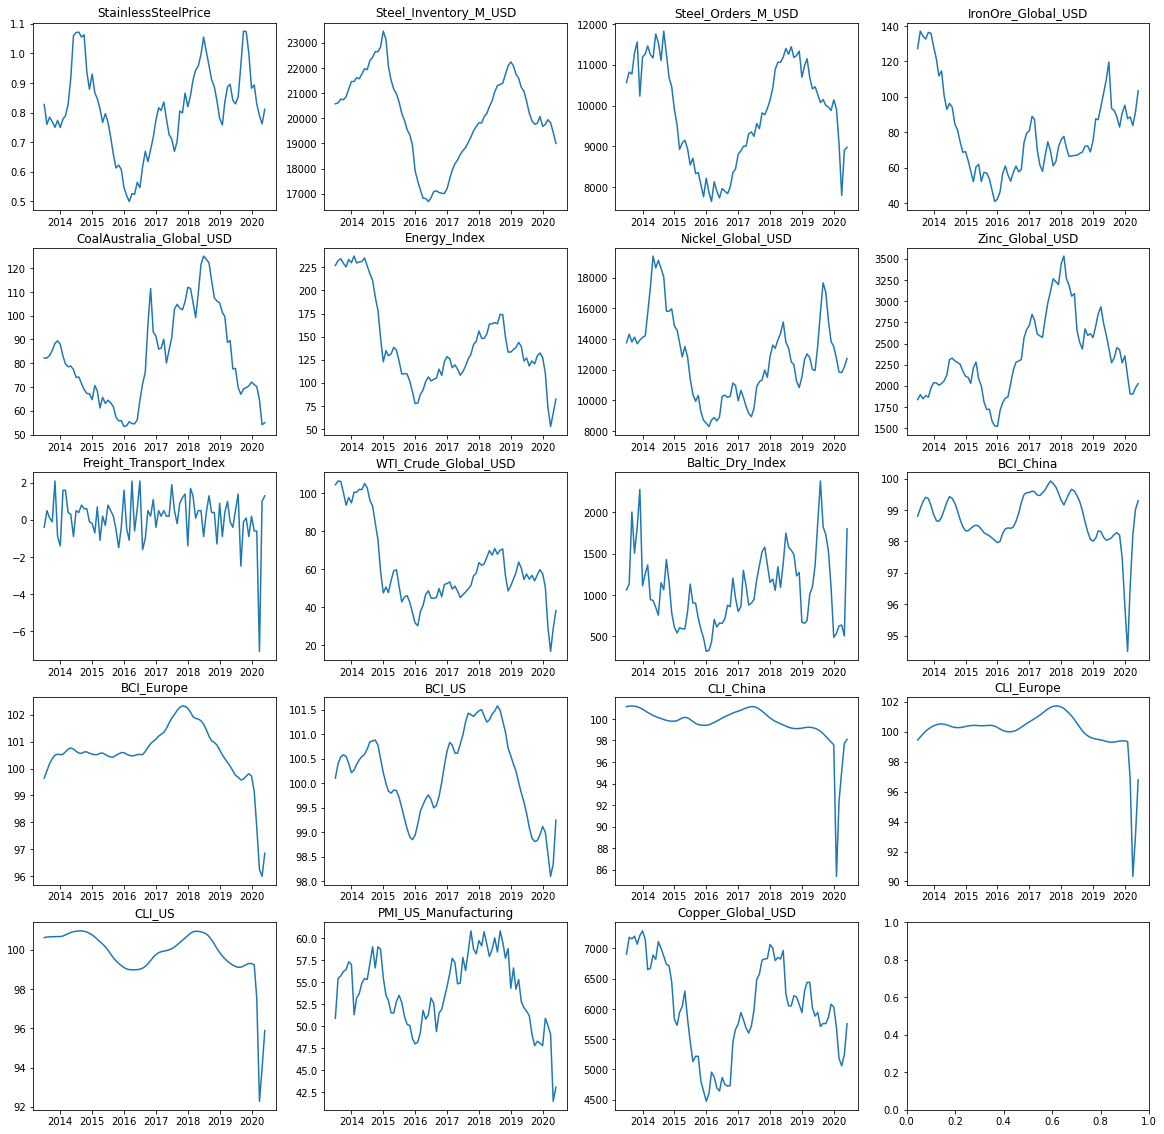

In [15]:
# plot all features including the target

fig, axs = plt.subplots(5, 4, figsize=(20,20))
    
axs[0, 0].plot(steel_df["StainlessSteelPrice"])
axs[0, 0].set_title('StainlessSteelPrice')

axs[0, 1].plot(steel_df["Steel_Inventory_M_USD"])
axs[0, 1].set_title('Steel_Inventory_M_USD')

axs[0, 2].plot(steel_df["Steel_Orders_M_USD"])
axs[0, 2].set_title('Steel_Orders_M_USD')

axs[0, 3].plot(steel_df["IronOre_Global_USD"])
axs[0, 3].set_title('IronOre_Global_USD')

axs[1, 0].plot(steel_df["CoalAustralia_Global_USD"])
axs[1, 0].set_title('CoalAustralia_Global_USD')

axs[1, 1].plot(steel_df["Energy_Index"])
axs[1, 1].set_title('Energy_Index')

axs[1, 2].plot(steel_df["Nickel_Global_USD"])
axs[1, 2].set_title('Nickel_Global_USD')

axs[1, 3].plot(steel_df["Zinc_Global_USD"])
axs[1, 3].set_title('Zinc_Global_USD')

axs[2, 0].plot(steel_df["Freight_Transport_Index"])
axs[2, 0].set_title('Freight_Transport_Index')

axs[2, 1].plot(steel_df["WTI_Crude_Global_USD"])
axs[2, 1].set_title('WTI_Crude_Global_USD')

axs[2, 2].plot(steel_df["Baltic_Dry_Index"])
axs[2, 2].set_title('Baltic_Dry_Index')

axs[2, 3].plot(steel_df["BCI_China"])
axs[2, 3].set_title('BCI_China')

axs[3, 0].plot(steel_df["BCI_Europe"])
axs[3, 0].set_title('BCI_Europe')

axs[3, 1].plot(steel_df["BCI_US"])
axs[3, 1].set_title('BCI_US')

axs[3, 2].plot(steel_df["CLI_China"])
axs[3, 2].set_title('CLI_China')

axs[3, 3].plot(steel_df["CLI_Europe"])
axs[3, 3].set_title('CLI_Europe')

axs[4, 0].plot(steel_df["CLI_US"])
axs[4, 0].set_title('CLI_US')

axs[4, 1].plot(steel_df["PMI_US_Manufacturing"])
axs[4, 1].set_title('PMI_US_Manufacturing')

axs[4, 2].plot(steel_df["Copper_Global_USD "])
axs[4, 2].set_title('Copper_Global_USD');

# Modelling

## Statistical Models

In [16]:
y = steel_df["StainlessSteelPrice"] # assign target to a variable y

In [17]:
adfuller(y)[1] # get the p-value to see if the data is stationary or not. The p-value should be less than 0.05 to have a 95% confidence in the stationarity.

0.15738956399879045

In [18]:
adfuller(y.diff(1).fillna(0))[1] # by differentiating one time we can get stationarity

2.0281967282450116e-08

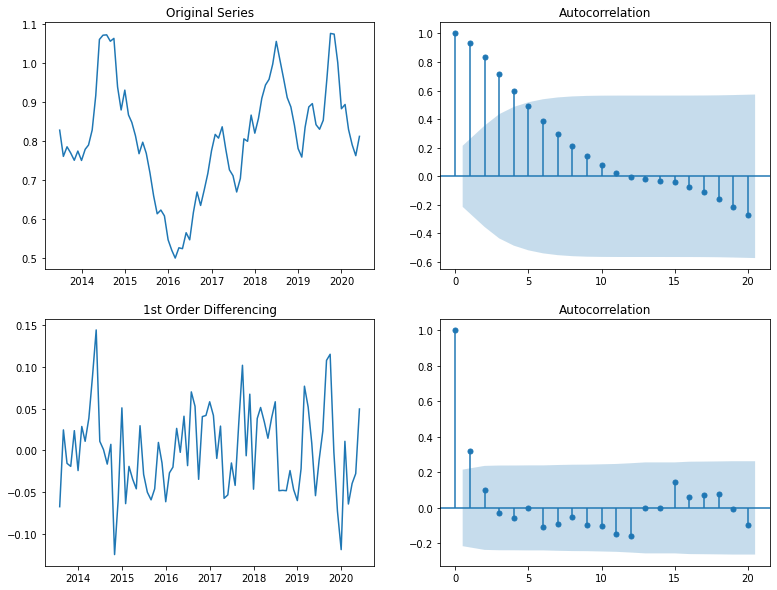

In [19]:
# Original Series
fig, axes = plt.subplots(2, 2, figsize=(13,10))
axes[0, 0].plot(y); axes[0, 0].set_title('Original Series')
plot_acf(y, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(y.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(y.diff().dropna(), ax=axes[1, 1])

plt.show()

In [20]:
y_diff = y.diff(1).dropna()
d = 1 # for 1-diff before stationary

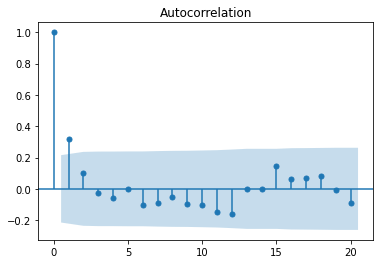

In [21]:
plot_acf(y_diff);

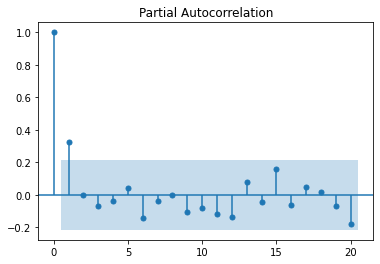

In [22]:
plot_pacf(y_diff);
p = 1 # number of lag beyond which the  𝐴𝐶𝐹  of  𝑌(𝑑)  cuts off

In [23]:
y = pd.DataFrame(y) # tranform y into a dataframe

In [24]:
# split y into train and test set

y_train = y[:59]
y_test = y[59:]

In [37]:
exog_df = steel_df.drop(columns="StainlessSteelPrice") # assign features to a exogeneous dataframe

In [38]:
# split exog_df into train and test set

exog_train = exog_df[:59]
exog_test = exog_df[59:]

In [25]:
adfuller(y)[1]

0.15738956399879045

In [39]:
sarimax_model = SARIMAX(y_train,order=(1,1,1),seasonal_order=(0,0,0,0),exog= exog_train)

/home/olavowsf/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/olavowsf/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [ ]:
sarimax_model.fit()

In [ ]:
sarimax_model.summary()

## Machine Learning Model

## Deep Learning Model

# Evaluate Model Performance

- use mape as score
- directional symmetry (smape)

# Model Tuning

## Hyper-Parameters

## Feature Selection